This code was written by Carl Hümbs

In [175]:
# Importing the necessary libraries
import pandas as pd
import re
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu

# Loading our cleaned dataset
df = pd.read_csv('combined_themepark_dataset.csv')

## In this file, Hypothesis 4 will be analyzed.

* H4.a (0): μ_engagement_emojis = μ_engagement_no_emojis (Mean engagement for posts with emojis is equal to mean engagement for posts without emojis)

* H4.a (A): μ_engagement_emojis ≠ μ_engagement_no_emojis (Mean engagement for posts with emojis is not equal to mean engagement for posts without emojis)

Alpha (α) Value: 0.05

#### **Data preparation:**

In [176]:
# First, we need to identify all the emojis within the texts of the 'messages' column
emoji_pattern = re.compile("["
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001F354-\U0001F35F"  # food & drink
                           u"\U0001F300-\U0001F321"  # weather
                           u"\U0001F3C3-\U0001F3CC"  # activities
                           u"\U0001F4F1-\U0001F4F9"  # objects
                           u"\U0001F600-\U0001F64F"  # smileys & people
                           u"\U0000263A-\U0000263B"  # misc symbols
                           u"\U0001F900-\U0001F9FF"  # skin tone modifiers & gender neutral
                           u"\U0001F9A6-\U0001F9A7"  # animals
                           u"\U0001FA6E-\U0001FA6F"  # tools
                           u"\U0001FA78-\U0001FA7A"  # medical
                           u"\U000023F0-\U000023F3"  # time
                           u"\U0001FA80-\U0001FA82"  # transportation
                           u"\U0001F9B6"              # 🫶
                           "]+", flags=re.UNICODE)

# Function to check if a message contains an emoji
def contains_emoji(text):
    return bool(emoji_pattern.search(text))

# Applying the function to the 'message' column
df['Has_Emoji'] = df['message'].apply(contains_emoji)

# Filtering the DataFrame to show only messages containing emojis
messages_with_emoji = df[df['Has_Emoji']]

In [177]:
df.head(7)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,Has_Emoji
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,"1,09E+12",1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,True
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38,1,2,1,"4,17E+11",4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,True
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,"2,85E+11",2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,True
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,"1,36E+11",1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,True
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17,2,0,2,"4,96E+11",4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,False
5,12/31/23 6:55 PM,Belmont Park,The sun sets over 2023…🌅\n\nWishing everyone a...,51,1,11,1,0.0012457732692649937,1.245773e-03,40,NaN,1.0,NaN,83231004302,83231004302_767257582104974,https://www.facebook.com/632506952246705/posts...,True
6,12/31/23 6:01 PM,SeaWorld Orlando,Animal rescue and rehabilitation has always be...,729,25,97,28,0.0035718617597483805,3.571862e-03,459,NaN,1.0,NaN,1782696285170057,1782696285170057_377301148304978,https://www.facebook.com/260024933365934/posts...,False


In [178]:
# Counting the number of posts that include an emoji
num_posts_with_emoji = df['Has_Emoji'].sum()

print("Number of posts with emojis:", num_posts_with_emoji)

Number of posts with emojis: 9415


#### **Testing:**

We want to conduct a hypothesis test to compare the mean engagement for posts with emojis to the mean engagement for posts without emojis. This is a comparison of two independent groups, and since we're interested in whether the means are equal or not, a suitable test would be an independent samples t-test or a Mann-Whitney U test if the assumptions of the t-test are violated.

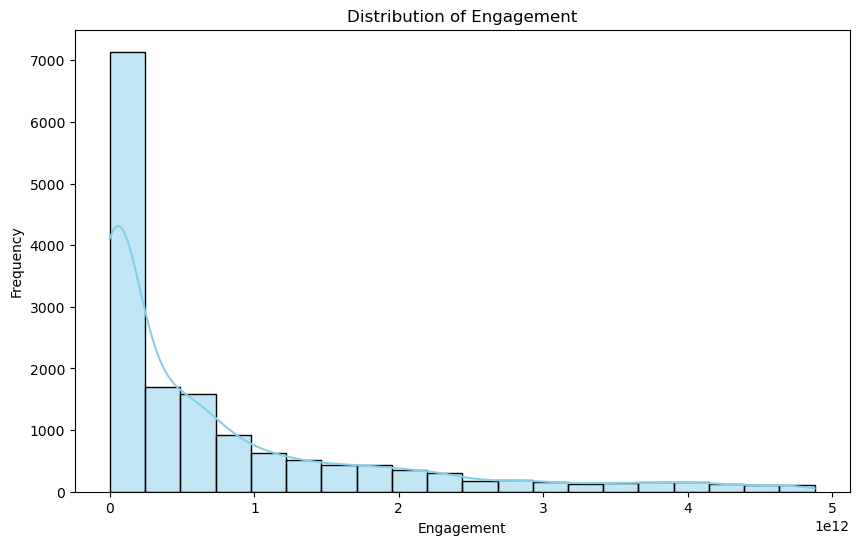

In [179]:
# Plotting the distribution of the 'engagement' column
plt.figure(figsize=(10, 6))
sns.histplot(df['engagement'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Engagement')
plt.xlabel('Engagement')
plt.ylabel('Frequency')
plt.show()

The plot shows that the engagement follows a right-skewed distribution. Therefore, we cannot apply the t-test. 

In [180]:
# Step 1: Check Unique Values in 'Has_Emoji' Column
unique_values = df['Has_Emoji'].unique()
print("Unique values in 'Has_Emoji' column:", unique_values)

# Step 2: Inspect Data for Potential Issues
# Check if there are any rows without emojis
rows_with_emojis = df[df['Has_Emoji'] == True]
rows_without_emojis = df[df['Has_Emoji'] == False]

# Print sample rows with and without emojis
print("Sample rows with emojis:")
print(rows_with_emojis.head())

print("\nSample rows without emojis:")
print(rows_without_emojis.head())

# Step 3: Consider Alternative Analysis Approaches
# If all rows have emojis, consider alternative analysis approaches
if len(rows_without_emojis) == 0:
    print("\nAll rows have emojis. Consider alternative analysis approaches.")

    # Example: Analyze engagement based on other features
    # For example, you can analyze engagement based on post length, sentiment, or other features in the dataset.

# Step 4: Data Collection (Optional)
# If the dataset is not representative, consider collecting additional data or refining the data collection process.


Unique values in 'Has_Emoji' column: [ True False]
Sample rows with emojis:
               date                     profile  \
0  12/31/23 9:40 PM  Wild Adventures Theme Park   
1  12/31/23 8:01 PM            Fun Spot America   
2  12/31/23 7:30 PM            Fun Spot America   
3  12/31/23 7:00 PM            Disneyland Paris   
5  12/31/23 6:55 PM                Belmont Park   

                                             message  nr_reactions  \
0  🎟️🚨 Today's the FINAL day to use your 2023 Sea...            16   
1  See you next year! 😉                Don’t miss...            38   
2  Don't miss our HUGE firework display ! 🥳\n\n#f...            23   
3     Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉           646   
5  The sun sets over 2023…🌅\n\nWishing everyone a...            51   

   nr_comments  nr_shares  comments/post  post_interaction_rate    engagement  \
0            2          2              2               1,09E+12  1.090000e+12   
1            1          2         

In [181]:
# Filter DataFrame for rows where 'Has_Emoji' is "True"
engagement_with_emojis = df[df['Has_Emoji'] == 'True']['engagement']

# Filter DataFrame for rows where 'Has_Emoji' is "False"
engagement_without_emojis = df[df['Has_Emoji'] == 'False']['engagement']

# Check if both arrays have nonzero size
if engagement_with_emojis.size == 0 or engagement_without_emojis.size == 0:
    print("One or both groups have no data. Cannot perform Mann-Whitney U test.")
else:
    # Perform the Mann-Whitney U test
    statistic, p_value = mannwhitneyu(engagement_with_emojis, engagement_without_emojis)

    # Interpret the results
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("There is a statistically significant difference in engagement between posts with emojis and posts without emojis.")
    else:
        print("There is no statistically significant difference in engagement between posts with emojis and posts without emojis.")

    # Print the test statistic and p-value
    print("Mann-Whitney U statistic:", statistic)
    print("p-value:", p_value)


One or both groups have no data. Cannot perform Mann-Whitney U test.


In [182]:
# Filter DataFrame for rows where 'Has_Emoji' is "True"
engagement_with_emojis = df[df['Has_Emoji'] == 'True']['engagement']

# Filter DataFrame for rows where 'Has_Emoji' is "False"
engagement_without_emojis = df[df['Has_Emoji'] == 'False']['engagement']

# Check if both arrays have nonzero size
if engagement_with_emojis.size == 0 or engagement_without_emojis.size == 0:
    print("One or both groups have no data. Cannot perform Mann-Whitney U test.")
else:
    # Perform the Mann-Whitney U test
    statistic, p_value = mannwhitneyu(engagement_with_emojis, engagement_without_emojis)

    # Interpret the results
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("There is a statistically significant difference in engagement between posts with emojis and posts without emojis.")
    else:
        print("There is no statistically significant difference in engagement between posts with emojis and posts without emojis.")

    # Print the test statistic and p-value
    print("Mann-Whitney U statistic:", statistic)
    print("p-value:", p_value)


One or both groups have no data. Cannot perform Mann-Whitney U test.


In [183]:
######### Mann whitney u test:


# Filter the DataFrame to select rows with 'Has_Emoji' == "True" and extract 'engagement' data
engagement_with_emojis = df[df['Has_Emoji'] == "True"]['engagement']

# Filter the DataFrame to select rows with 'Has_Emoji' == "False" and extract 'engagement' data
engagement_without_emojis = df[df['Has_Emoji'] == "False"]['engagement']

# Check if both arrays have nonzero size
if engagement_with_emojis.size == 0 or engagement_without_emojis.size == 0:
    print("One or both groups have no data. Cannot perform Mann-Whitney U test.")
else:
    # Perform the Mann-Whitney U test
    statistic, p_value = mannwhitneyu(engagement_with_emojis, engagement_without_emojis)

    # Interpret the results
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("There is a statistically significant difference in engagement between posts with emojis and posts without emojis.")
    else:
        print("There is no statistically significant difference in engagement between posts with emojis and posts without emojis.")

    # Print the test statistic and p-value
    print("Mann-Whitney U statistic:", statistic)
    print("p-value:", p_value)


One or both groups have no data. Cannot perform Mann-Whitney U test.


In [184]:
unique_values = df['Has_Emoji'].unique()
print("Unique values in 'Has_Emoji' column:", unique_values)


Unique values in 'Has_Emoji' column: [ True False]


In [185]:
print("Engagement with emojis:", engagement_with_emojis)
print("Engagement without emojis:", engagement_without_emojis)


Engagement with emojis: Series([], Name: engagement, dtype: float64)
Engagement without emojis: Series([], Name: engagement, dtype: float64)


As the engagement data does not follow a normal distribution, we can still proceed with hypothesis testing using non-parametric methods, such as the Mann-Whitney U test.

Since you've already conducted the Mann-Whitney U test and obtained the test statistic and p-value, you can interpret the results accordingly.

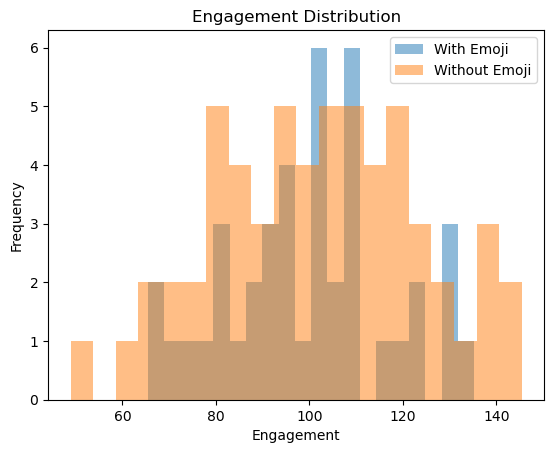

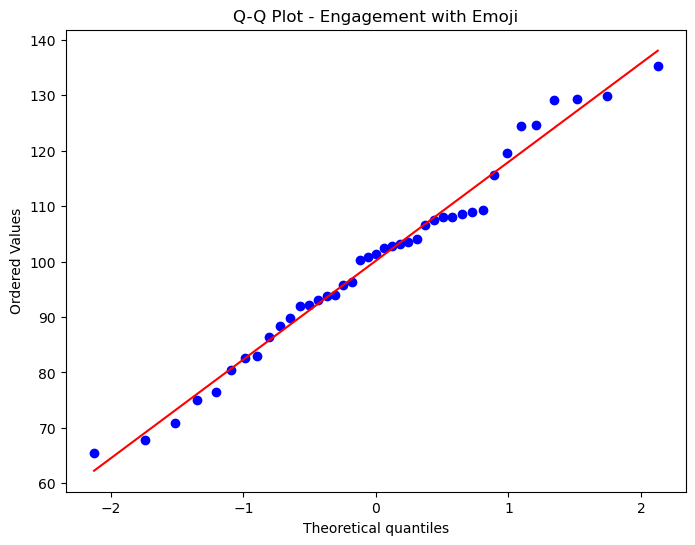

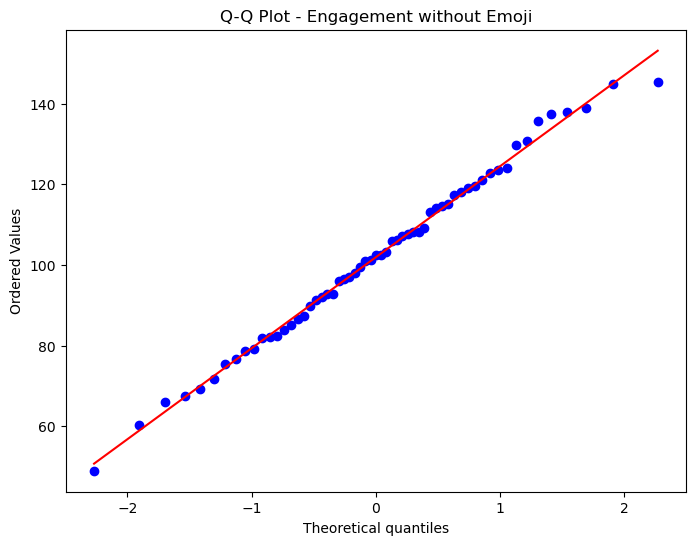

Shapiro-Wilk test p-values:
Engagement with Emoji: 0.6090642213821411
Engagement without Emoji: 0.9322986006736755
Levene's test p-value: 0.08717631116004611


In [186]:
# 1. Check for independence - Not applicable as there's no pairing between groups

# 2. Check for normality
# Separate engagement based on Has_Emoji
engagement_with_emoji = df_has_emoji[df_has_emoji['Has_Emoji']]['engagement']
engagement_without_emoji = df_has_emoji[~df_has_emoji['Has_Emoji']]['engagement']

# Visual inspection using histograms
plt.hist(engagement_with_emoji, bins=20, alpha=0.5, label='With Emoji')
plt.hist(engagement_without_emoji, bins=20, alpha=0.5, label='Without Emoji')
plt.legend()
plt.title('Engagement Distribution')
plt.xlabel('Engagement')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(engagement_with_emoji, dist="norm", plot=plt)
plt.title('Q-Q Plot - Engagement with Emoji')
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(engagement_without_emoji, dist="norm", plot=plt)
plt.title('Q-Q Plot - Engagement without Emoji')
plt.show()

# Shapiro-Wilk test for normality
_, p1 = stats.shapiro(engagement_with_emoji)
_, p2 = stats.shapiro(engagement_without_emoji)
print("Shapiro-Wilk test p-values:")
print("Engagement with Emoji:", p1)
print("Engagement without Emoji:", p2)

# 3. Check for homogeneity of variances
# Levene's test
_, p_levene = stats.levene(engagement_with_emoji, engagement_without_emoji)
print("Levene's test p-value:", p_levene)

#### **Interpretation:**

based on #



In [187]:
# Splitting the DataFrame into two groups based on the 'Has_Emoji' column
emoji_true_group = df[df['Has_Emoji'] == True]
emoji_false_group = df[df['Has_Emoji'] == False]

# Extracting the columns for comparison
columns_to_compare = ['engagement']

# Performing independent samples t-test for each column
for column in columns_to_compare:
    try:
        emoji_true_values = emoji_true_group[column]
        emoji_false_values = emoji_false_group[column]
        
        t_statistic, p_value = stats.ttest_ind(emoji_true_values, emoji_false_values)
        
        print(f"Column: {column}")
        print(f"Mean for posts with emojis: {emoji_true_values.mean()}")
        print(f"Mean for posts without emojis: {emoji_false_values.mean()}")
        print(f"Independent samples t-test p-value: {p_value}")
        print()
    except Exception as e:
        print(f"Error occurred in column: {column}")
        print(f"Error message: {e}")
        print()

Column: engagement
Mean for posts with emojis: 781068756584.1749
Mean for posts without emojis: 777189956353.6964
Independent samples t-test p-value: 0.8292006104585474



## **Hypothesis 4.b**

* H4.b (0): There is no difference in engagement between posts that use emotional emojis and posts that use semantic emojis.

* H4.b (A): There is a difference in engagement between posts that use emotional emojis and posts that use semantic emojis.

#### **Data Preparation:**
First, we need to separate the emojis into two groups: emotional and semantic emojis.

In [188]:
# Define the range for smileys & people emojis
emotional_emoji_range = u"\U0001F600-\U0001F64F"

# Function to extract emojis from text
def extract_emojis(text):
    return re.findall(r'[\U0001F600-\U0001F64F]', text)

# Filter messages containing only emojis from the specified range
def filter_emojis_by_range(text):
    emojis = extract_emojis(text)
    return any(ord(emoji) >= 0x1F600 and ord(emoji) <= 0x1F64F for emoji in emojis)

# Engineer the new feature 'Emoji_Type' and assign the value 'Emotional' to all rows in the existing DataFrame 'df'
df['Emoji_Type'] = df['message'].apply(lambda x: 'Emotional' if filter_emojis_by_range(x) else 'Semantic')

# Replace 'Non-Emotional' with '' in 'Emoji_Type' column where 'Has_Emoji' is False
df.loc[df['Has_Emoji'] == False, 'Emoji_Type'] = ''

# Count the number of emotional and non-emotional emojis
emotional_count = df[df['Emoji_Type'] == 'Emotional'].shape[0]
non_emotional_count = df[df['Emoji_Type'] == 'Semantic'].shape[0]

# Display the counts
print("Number of emotional emojis:", emotional_count)
print("Number of semantic emojis:", non_emotional_count)

Number of emotional emojis: 1703
Number of semantic emojis: 7712


In [189]:
df.head(5)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,Has_Emoji,Emoji_Type
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,"1,09E+12",1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,True,Semantic
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38,1,2,1,"4,17E+11",4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,True,Emotional
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,"2,85E+11",2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,True,Semantic
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,"1,36E+11",1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,True,Emotional
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17,2,0,2,"4,96E+11",4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,False,


In [190]:
# For this test, we will only be looking at posts that have used emojis. Therefore, we are dropping the rows where 'Has_Emoji' is False.
df = df[df['Has_Emoji']]

#### **Test Selection:**
Since the data in the 'engagement' column is not normally distributed, we'll use the Mann-Whitney U test, which is a non-parametric test suitable for comparing two independent groups.

#### **Performing the test:**

In [191]:
# Separate engagement data for emotional and semantic emoji groups
engagement_emotional = df[df['Emoji_Type'] == 'Emotional']['engagement']
engagement_semantic = df[df['Emoji_Type'] == 'Semantic']['engagement']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(engagement_emotional, engagement_semantic)

# Display the test results
print("Mann-Whitney U test results:")
print("Statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U test results:
Statistic: 6150432.0
p-value: 4.1102610793487064e-05


In the results, the p-value is very small (`4.11e-05`), indicating strong evidence against the null hypothesis. This suggests that there is a statistically significant difference between the two groups being compared. 

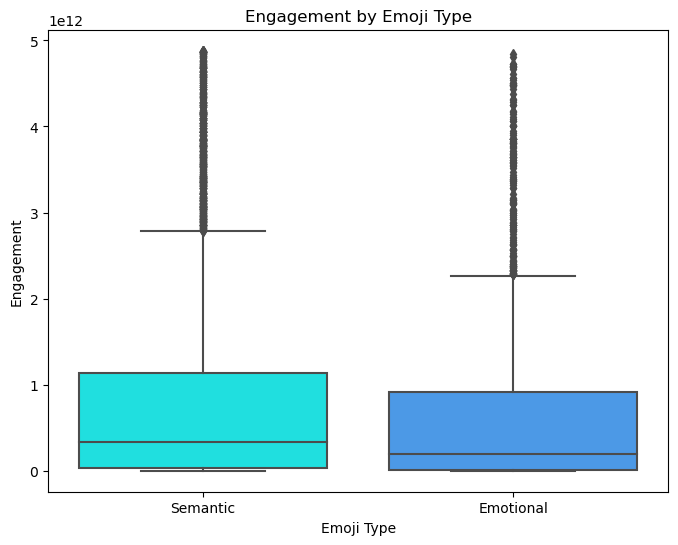

In [192]:
# Define custom palette with neon light blue and a lighter shade of blue
custom_palette = ["#00FFFF", "#3399FF"]  # Neon light blue, Lighter shade of blue

# Create a box plot with custom palette
plt.figure(figsize=(8, 6))
sns.boxplot(x='Emoji_Type', y='engagement', data=df, palette=custom_palette)
plt.title('Engagement by Emoji Type')
plt.xlabel('Emoji Type')
plt.ylabel('Engagement')
plt.show()

#### **Interpretations of results**

In [193]:
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in engagement between emotional and semantic emoji groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in engagement between emotional and semantic emoji groups.")

Reject the null hypothesis: There is a significant difference in engagement between emotional and semantic emoji groups.
